# Meshgrid

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

Return a tuple of coordinate matrices from coordinate vectors.

For vectors x1, x2,…, xn with lengths Ni=len(xi), returns (N1, N2, N3,..., Nn) shaped arrays if indexing='ij' or (N2, N1, N3,..., Nn) shaped arrays if indexing='xy' with the elements of xi repeated to fill the matrix along the first dimension for x1, the second for x2 and so on.

Giving the string 'ij' returns a meshgrid with matrix indexing, while 'xy' returns a meshgrid with Cartesian indexing. In the 2-D case with inputs of length M and N, the outputs are of shape (N, M) for 'xy' indexing and (M, N) for 'ij' indexing. In the 3-D case with inputs of length M, N and P, outputs are of shape (N, M, P) for 'xy' indexing and (M, N, P) for 'ij' indexing. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nx, ny = 3, 2
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [ ]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [ ]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

The result of meshgrid is a coordinate grid:

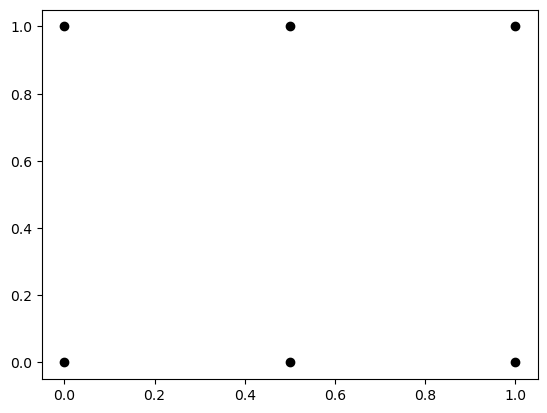

In [ ]:
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

You can create sparse output arrays to save memory and computation time.

In [ ]:
xv, yv = np.meshgrid(x, y, sparse=True)
xv

array([[0. , 0.5, 1. ]])

In [ ]:
yv

array([[0.],
       [1.]])

meshgrid is very useful to evaluate functions on a grid. If the function depends on all coordinates, both dense and sparse outputs can be used.

In [ ]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)

(101, 101) (101, 101) (101, 101)


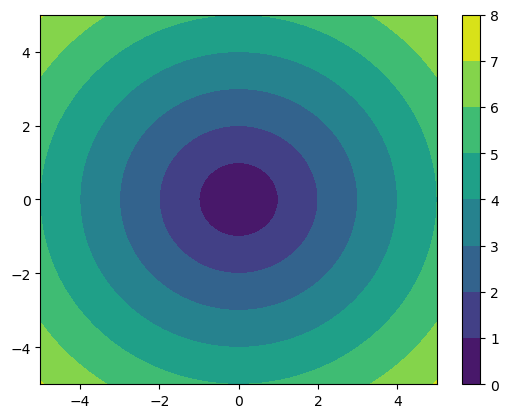

In [ ]:
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
print(xx.shape, yy.shape, zz.shape)

plt.contourf(xx, yy, zz)
plt.colorbar()
plt.show()

(1, 101) (101, 1) (101, 101)


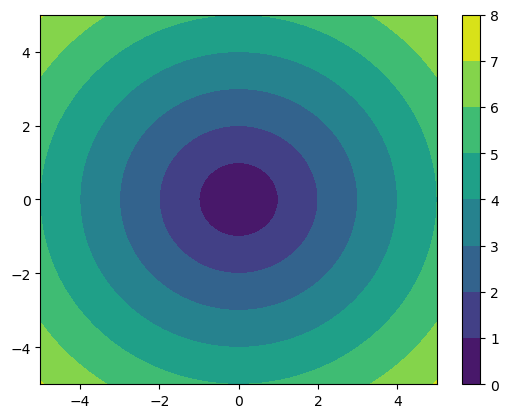

In [ ]:
# sparse coordinate arrays
xx, yy = np.meshgrid(x, y, sparse=True)
zz = np.sqrt(xx**2 + yy**2)
print(xx.shape, yy.shape, zz.shape)

plt.contourf(x, y, zz)
plt.colorbar()
plt.show()

## contourf vs pcolormesh vs imshow

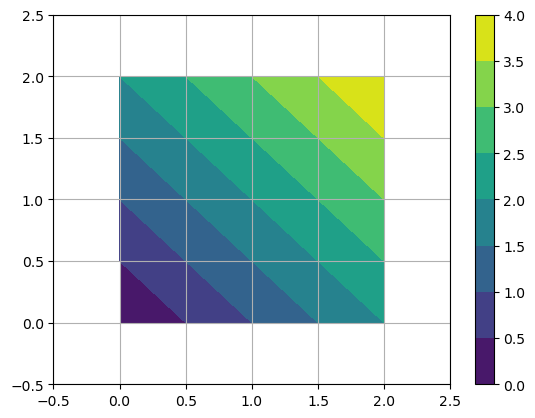

In [ ]:
x = np.linspace(0, 2, 3)
y = np.linspace(0, 2, 3)
X, Y = np.meshgrid(x, y)
Z = X+Y

plt.contourf(X, Y, Z)
plt.colorbar()
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.show()

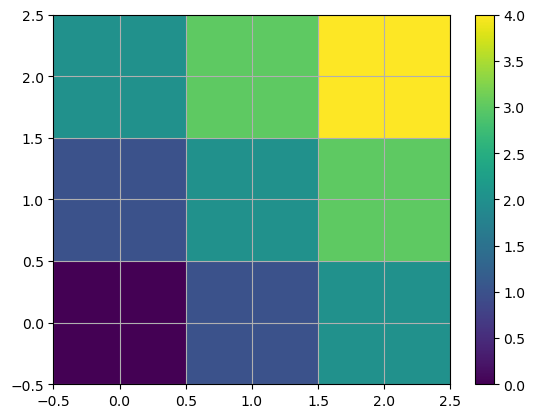

In [ ]:
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.show()

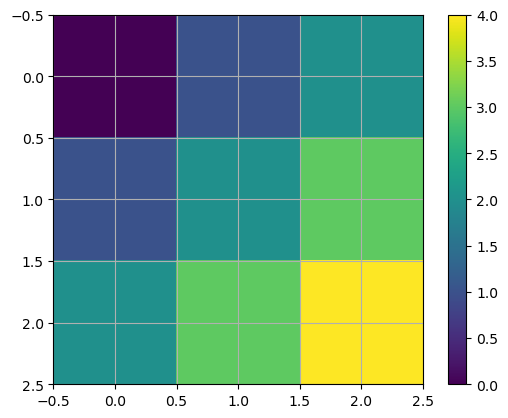

In [ ]:
plt.imshow(Z)
plt.colorbar()
plt.grid()
plt.show()

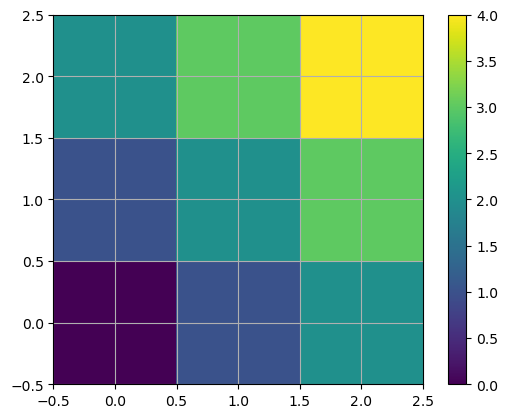

In [ ]:
plt.imshow(Z, origin='lower')
plt.colorbar()
plt.grid()
plt.show()

## xy vs ij

In [ ]:
x = np.linspace(0, 2, 3).astype(int)
y = np.linspace(0, 2, 3).astype(int)
X, Y = np.meshgrid(x, y, indexing='xy')
print(X, end='\n\n')
print(Y, end='\n\n')
U = np.array([
    f"({X[i, j]}, {Y[i, j]})" for i in range(len(x)) for j in range(len(y))
]).reshape(3, 3)
print(U, end='\n\n')
print(U.T, end='\n\n')
print(np.flipud(U), end='\n\n')
print(np.flipud(U.T), end='\n\n')

[[0 1 2]
 [0 1 2]
 [0 1 2]]

[[0 0 0]
 [1 1 1]
 [2 2 2]]

[['(0, 0)' '(1, 0)' '(2, 0)']
 ['(0, 1)' '(1, 1)' '(2, 1)']
 ['(0, 2)' '(1, 2)' '(2, 2)']]

[['(0, 0)' '(0, 1)' '(0, 2)']
 ['(1, 0)' '(1, 1)' '(1, 2)']
 ['(2, 0)' '(2, 1)' '(2, 2)']]

[['(0, 2)' '(1, 2)' '(2, 2)']
 ['(0, 1)' '(1, 1)' '(2, 1)']
 ['(0, 0)' '(1, 0)' '(2, 0)']]

[['(2, 0)' '(2, 1)' '(2, 2)']
 ['(1, 0)' '(1, 1)' '(1, 2)']
 ['(0, 0)' '(0, 1)' '(0, 2)']]



In [ ]:
x = np.linspace(0, 2, 3).astype(int)
y = np.linspace(0, 2, 3).astype(int)
X, Y = np.meshgrid(x, y, indexing='ij')
print(X, end='\n\n')
print(Y, end='\n\n')
U = np.array([
    f"({X[i, j]}, {Y[i, j]})" for i in range(len(x)) for j in range(len(y))
]).reshape(3, 3)
print(U, end='\n\n')
print(U.T, end='\n\n')
print(np.flipud(U), end='\n\n')
print(np.flipud(U.T), end='\n\n')

[[0 0 0]
 [1 1 1]
 [2 2 2]]

[[0 1 2]
 [0 1 2]
 [0 1 2]]

[['(0, 0)' '(0, 1)' '(0, 2)']
 ['(1, 0)' '(1, 1)' '(1, 2)']
 ['(2, 0)' '(2, 1)' '(2, 2)']]

[['(0, 0)' '(1, 0)' '(2, 0)']
 ['(0, 1)' '(1, 1)' '(2, 1)']
 ['(0, 2)' '(1, 2)' '(2, 2)']]

[['(2, 0)' '(2, 1)' '(2, 2)']
 ['(1, 0)' '(1, 1)' '(1, 2)']
 ['(0, 0)' '(0, 1)' '(0, 2)']]

[['(0, 2)' '(1, 2)' '(2, 2)']
 ['(0, 1)' '(1, 1)' '(2, 1)']
 ['(0, 0)' '(1, 0)' '(2, 0)']]

